# Molecular Visualization with GGMolVis

This notebook provides some basic usage examples of the GGMolVis library.

Currently, they are proof of concept examples and are subject to change (and implement) in the future.

Please refer to the Installation guide for instructions on how to install the library.

In [1]:
import MDAnalysis as mda
from ggmolvis.tests.data import PSF, DCD
from MDAnalysis.analysis.rms import RMSD

import molecularnodes as mn
import numpy as np
import bpy

import ggmolvis
from ggmolvis.ggmolvis import GGMolVis

2024-12-17 19:47:24.689 | DEBUG    | ggmolvis:<module>:50 - Blend file stored at /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/ggmolvis.blend
2024-12-17 19:47:24.737 | DEBUG    | ggmolvis.ggmolvis:__new__:70 - Creating new GGMolVis


In [2]:
print(f'ggmolvis version: {ggmolvis.__version__}')
print(f'ggmolvis path: {ggmolvis.__file__}')
print(f'molecularnodes version: {mn.__file__}')

ggmolvis version: 0.1.0+0.g84c0ca8.dirty
ggmolvis path: /Users/brady/git/ggmolvis/ggmolvis/__init__.py
molecularnodes version: /Users/brady/git/ggmolvis/.venv/lib/python3.11/site-packages/molecularnodes/__init__.py


## Trajectory Visualization

Load the trajectory file by creating a MDAnalysis Universe object.
Replace `PSF` to your own topology file and `DCD` to your own trajectory file.

In [3]:
%%capture
u = mda.Universe(PSF, DCD)

Initialize the GGMolVis object. It can be thought of as a `Figure` or a canvas for the molecular visualization.

In [4]:
ggmv = GGMolVis()

Select molecular entities of interest to be visualized. Refer to: https://docs.mdanalysis.org/stable/documentation_pages/selections.html for the selection syntax.

In [5]:
residues_ag = u.select_atoms('resid 127 40')
protein_ag = u.select_atoms('protein')

Here we include our molecules into the `GGMolVis` object by calling the `molecule` method.

In [6]:
residue_mol = ggmv.molecule(residues_ag)
protein_mol = ggmv.molecule(protein_ag, style='cartoon')
protein_surface_mol = ggmv.molecule(protein_ag, style='surface', material='transparent')

Render the current frame by calling the `render` method.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpgc8w9iau.PNG


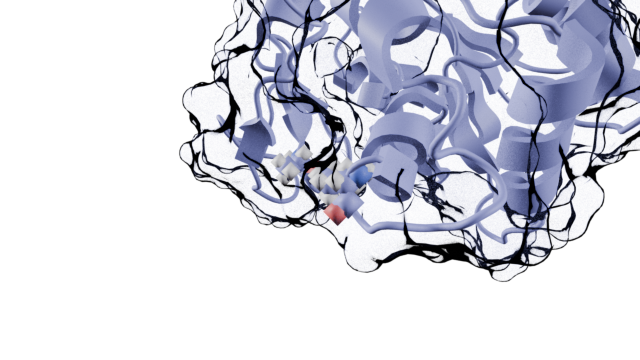

In [7]:
residue_mol.render(engine="EEVEE")

Render the selected frame by calling the `render(frame)` method.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpl0gaumft.PNG


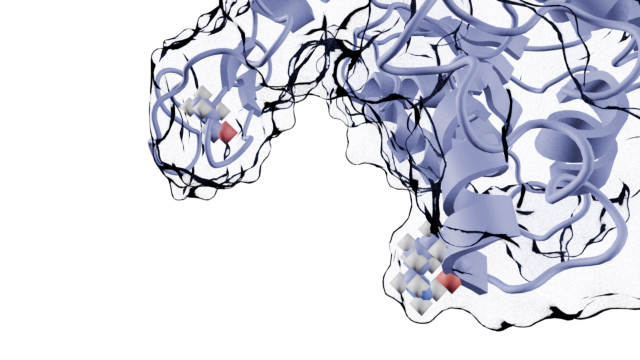

In [8]:
residue_mol.render(frame=60, engine="EEVEE")

You can render the whole trajectory by calling the `.render(mode='movie')` method.

You can change the representation style by calling `set_style` method.

In [9]:
residue_mol.set_style('ball_and_stick')

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpb_vr7ddn.PNG


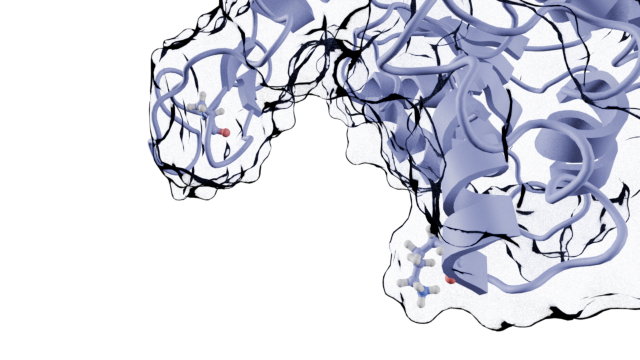

In [10]:
residue_mol.render(engine="EEVEE")

Each molecule has a unique camera view pointing to the center of the molecule. There is also a global camera view. You can render different camera views by calling `render` with different molecules.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpef_7eehq.PNG


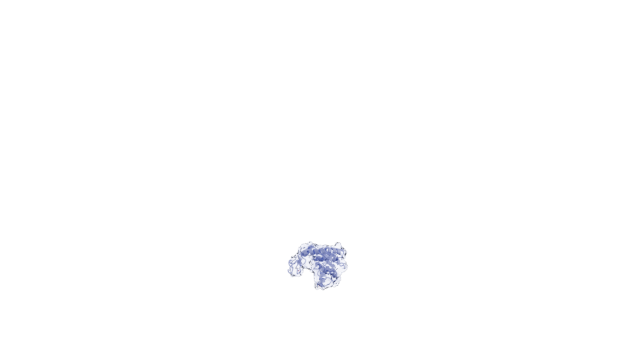

In [11]:
ggmv.global_camera.render()

Alternatively, GGMolVis also provides a `visualize` method to `AtomGroup`.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpvh1j5rm2.PNG


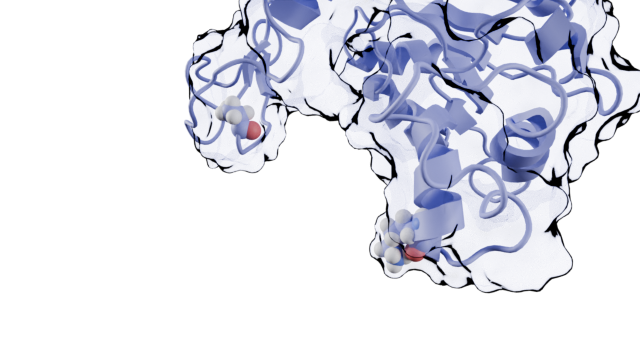

In [12]:
residues_ag.visualize()

## Geometric feature Visualization

Visualize simple geometric features, e.g. distance can be done by calling the `distance` method.

In [13]:
res_1 = residues_ag.residues[0].atoms
res_2 = residues_ag.residues[1].atoms
line = ggmv.distance(res_1, res_2, location=(5,0,0))

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp4kmdbtes.PNG


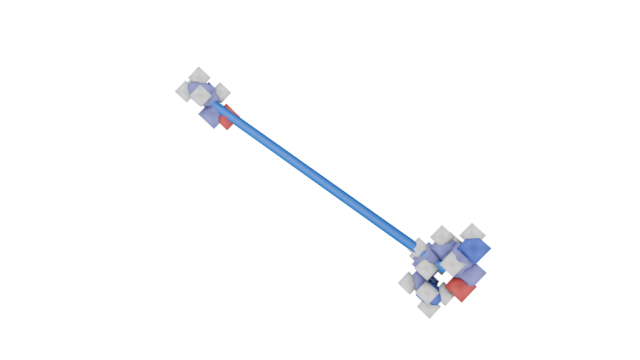

In [14]:
line.render(engine="EEVEE")

## Analysis Visualization

In [15]:
rmsd = RMSD(u.select_atoms('name CA'))
rmsd.run()

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpfaclqyv6.PNG


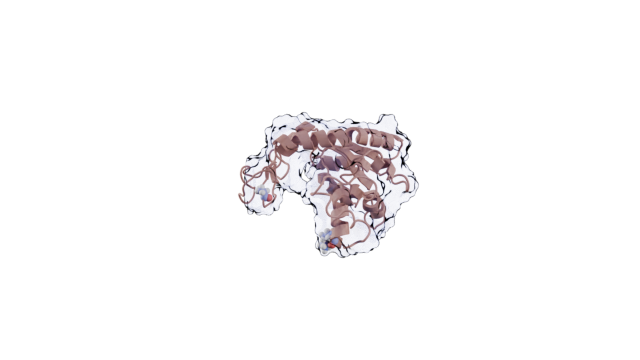

In [16]:
vis = rmsd.visualize()

In [17]:
vis.render(mode='movie', engine="EEVEE", filepath="~/Desktop/test.mp4", verbose=True)

Rendering to: ~/Desktop/test.mp4
Rendering to: ~/Desktop/test.mp4
Fra:1 Mem:141.98M (Peak 448.47M) | Time:00:00.64 | Rendering 1 / 64 samples
Fra:1 Mem:141.92M (Peak 448.47M) | Time:00:00.78 | Rendering 25 / 64 samples
Fra:1 Mem:141.98M (Peak 448.47M) | Time:00:00.90 | Rendering 50 / 64 samples
Fra:1 Mem:141.92M (Peak 448.47M) | Time:00:00.98 | Rendering 64 / 64 samples
Append frame 1
Time: 00:01.02 (Saving: 00:00.00)

Fra:2 Mem:142.01M (Peak 448.47M) | Time:00:00.34 | Rendering 1 / 64 samples
Fra:2 Mem:142.01M (Peak 448.47M) | Time:00:00.48 | Rendering 25 / 64 samples
Fra:2 Mem:142.07M (Peak 448.47M) | Time:00:00.63 | Rendering 50 / 64 samples
Fra:2 Mem:142.01M (Peak 448.47M) | Time:00:00.74 | Rendering 64 / 64 samples
Append frame 2
Time: 00:00.78 (Saving: 00:00.00)

Fra:3 Mem:142.19M (Peak 448.47M) | Time:00:00.34 | Rendering 1 / 64 samples
Fra:3 Mem:142.19M (Peak 448.47M) | Time:00:00.46 | Rendering 25 / 64 samples
Fra:3 Mem:142.25M (Peak 448.47M) | Time:00:00.56 | Rendering 50 / 6

Error in bpy.app.handlers.frame_change_post[0]:


IndexError: Index 98 exceeds length of trajectory (98).

Fra:98 Mem:142.39M (Peak 448.47M) | Time:00:00.50 | Rendering 1 / 64 samples
Fra:98 Mem:142.39M (Peak 448.47M) | Time:00:00.62 | Rendering 25 / 64 samples
Fra:98 Mem:142.45M (Peak 448.47M) | Time:00:00.73 | Rendering 50 / 64 samples
Fra:98 Mem:142.39M (Peak 448.47M) | Time:00:00.81 | Rendering 64 / 64 samples
Append frame 98
Time: 00:00.84 (Saving: 00:00.00)

